# 1
At 500K the initial rate of a certain reaction occurring in a batch reactor is ten times the initial rate at 400K. Will the rate ratio of 10:1 stay constant as the composition changes in the reactor? What is the activation energy of this reaction? [38.29 kJ/mol]

# 2

The following reaction was studied in a laboratory batch reactor:
$$A\to2B$$
The initial concentration of A was 2 mol/l and the initial concentration of B was 1 mol/l (for all the experiments). You can assume that the volume of the reaction does not change. Three reactor runs were performed at temperatures of 25°C, 35°C and 45°C (temperature stayed constant throughout the run). The following results were obtained:

|Time (minutes)|Conc of B (mol/l) 25°C|Conc of B (mol/l) 35°C|Conc of B (mol/l) 45°C|
|---|---|---|---|
|0.00|1.00|1.00|1.00|
|1.00|1.85|2.20|2.61|
|2.00|2.53|3.04|3.57|
|3.00|3.05|3.63|4.15|
|4.00|3.47|4.04|4.49|
|6.00|4.05|4.53|4.82|
|10.00|4.64|4.89|4.98|
|200|5|5|5|

Is the reaction reversible or not? How long will it take to achieve a 50% conversion of A, if the same reactor is operated at 75°C and when we start with 4 mol/l of A and no B. [0.5 min, E=30kJ/mol]

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
from scipy.optimize import fsolve as fsolve



markdown_table = """|---|---|---|---|
|0.00|1.00|1.00|1.00|
|1.00|1.85|2.20|2.61|
|2.00|2.53|3.04|3.57|
|3.00|3.05|3.63|4.15|
|4.00|3.47|4.04|4.49|
|6.00|4.05|4.53|4.82|
|10.00|4.64|4.89|4.98|
|200|5|5|5|"""


# Read the Markdown table into a DataFrame
df = pd.read_csv(StringIO(markdown_table), sep='|', header=None)
df = df.drop(0, axis=0)

# Convert the columns to arrays
column1_array = df[1].astype(float).values
column2_array = df[2].astype(float).values
column1_array = np.array(column1_array)
column2_array = np.array(column2_array)

column3_array = df[3].astype(float).values
column4_array = df[4].astype(float).values
column3_array = np.array(column3_array)
column4_array = np.array(column4_array)

print(column1_array)


[  0.   1.   2.   3.   4.   6.  10. 200.]


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 110
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000001C8493FDF40>
   status: 0
  success: True
        t: array([ 0.        ,  0.07228835,  0.6764533 ,  1.34134323,  2.04627538,
        2.75690094,  3.46904204,  4.18288812,  4.90072845,  5.62836326,
        6.3789985 ,  7.17893042,  8.07127236,  9.11570329, 10.39339522,
       12.02730963, 14.21768857, 17.18652185, 20.        ])
 t_events: [array([0.52554029])]
        y: array([[2.00000000e+00, 1.81813627e+00, 8.19768821e-01, 3.41254175e-01,
        1.34784068e-01, 5.28393111e-02, 2.06734474e-02, 8.07045575e-03,
        3.13407776e-03, 1.20156944e-03, 4.47008258e-04, 1.55935265e-04,
        4.82665982e-05, 1.23424970e-05, 2.44497428e-06, 4.33417378e-07,
        1.99216659e-07, 5.72660946e-07, 1.17137240e-06],
       [1.00000000e+00, 1.36372746e+00, 3.36046236e+00, 4.31749165e+00,
        4.73043186

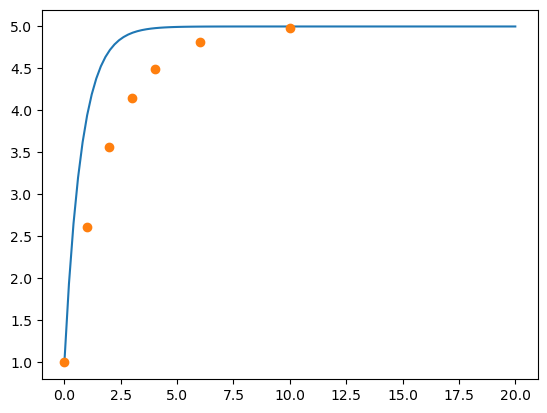

In [4]:
    
def batch(k):    
    
    t = 20
    
    t_span = np.linspace(0,t,100)
    
    V = 1
    
    initial_conditions = [2,1]
    
 
    m = 1
  
    
    def rates(t,y):
        
        NA,NB= y[0],y[1]
        CA,CB = NA/V , NB/V 
        
        rA = -k*(CA**m)
        rB = -2*rA

        
        dNA = rA*V
        dNB = rB*V
     
        return dNA,dNB
    
    
    def event(t,y):
        
        return y[0] - 1
    

    
    solution = solve_ivp(rates,(0,t), initial_conditions,dense_output = True, events = event)
    
    sol = solution.sol(t_span)
    
    plt.plot(t_span,sol[1])
    plt.plot(column1_array[:-1],column4_array[:-1],'o')
    
    return solution

print(batch(k4))

In [13]:
k1 = 0.235
k2 = 0.35
k3 = 0.5

T1 = 25 + 273.15
T2 = 35 + 273.15
T3 = 45 + 273.15
T4 = 75 + 273.15
R = 8.314

def find(var):
    
    ko , E = var[0],var[1]
    
    eq1 = ko*np.exp(-E/(R*T1)) - k1
    eq2 = ko*np.exp(-E/(R*T3)) - k3
    
    return eq1,eq2

ko, E = fsolve(find,[2,0.5])

print(ko,E)

k4 = ko*np.exp(-E/(R*T4))
print(k4)

38651.930250663085 29771.91073818913
1.31881870991862


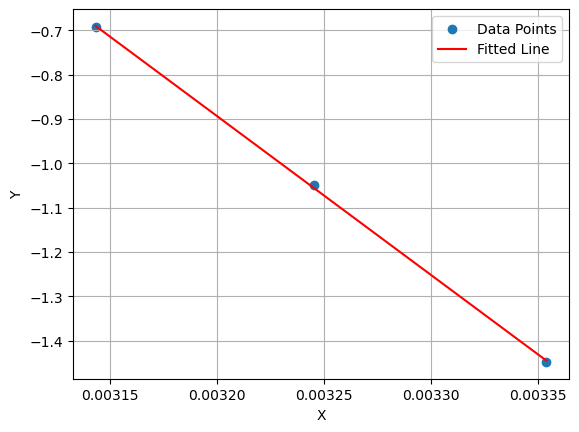

E = 29.77923230775015
ko = 38873.716090619375


In [16]:
import numpy as np
import matplotlib.pyplot as plt


x = np.array([1/T1, 1/T2, 1/T3])
y = np.array([np.log(k1),np.log(k2),np.log(k3)])

slope, intercept = np.polyfit(x, y, 1)

def linear_function(x):
    return slope * x + intercept


x_range = np.linspace(min(x), max(x), 100)

y_line = linear_function(x_range)


plt.scatter(x, y, label="Data Points")
plt.plot(x_range, y_line, color='red', label="Fitted Line")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

E = -slope*R/1000
ko = np.exp(intercept)

print(f'E = {E}')
print(f'ko = {ko}')


# 3

The aqueous reaction $ A \to R + S $ proceeds as follows:

|Time, min|0|36|65|100|160|$\infty$|
|---|---|---|---|---|---|---|
|$C_A$, mol/L|0.1823|0.1453|0.1216|0.1025|0.0795|0.0494|

with

$C_{A0}$ = 0.1823 mol/l,

$C_{R0}$ = 0,

$C_{S0}$ = 55 mol/l.

Find the rate equation for this reaction. [$-r_A = 6.76\times 10^{-3}$ $CA - 4.54\times 10^{-5} C_RC_S$]




In [ ]:
   
def batch(k1,k2):  
    
    data_CA = [0.1823,0.1453,0.1216,0.1025,0.0795]
    data_t = [0,36,65,100,160] 
    
    
    t = 160
    
    t_span = np.linspace(0,t,10)
    
    V = 1
    
    initial_conditions = [0.1823,0,55]
    
 
    def rates(t,y):
        
        NA,NB,NC= y[0],y[1],y[2]
        CA,CB,CC = NA/V , NB/V , NC/V
        
        rA = -k1*CA + k2*CB*CC
        rB = -rA
        rC = -rA

        
        dNA = rA*V
        dNB = rB*V
        dNC = rC*V
     
        return dNA,dNB,dNC
    
    
   

    
    solution = solve_ivp(rates,(0,t), initial_conditions,dense_output = True)
    
    sol = solution.sol(t_span)
    
    
    plt.plot(t_span,sol[0])
    plt.plot(data_t,data_CA,'o')
    
    return solution.t



print(batch(6.67*10**-3,4.54*10**-5))

In [ ]:
def():
    
    

    CA = [0.1823,0.1453,0.1216,0.1025,0.0795,0.0494]
    rA = -k1*CA + k2*CB*CC


# 4
Hellin and Jungers (1957) present the data in the table on the reaction of sulphuric acid with diethylsulphate in aqueous solution at 22,9°C:

$$ H_2SO_4 + (C_2H_5)_2SO_4 \to 2C_2H_5SO_4H$$

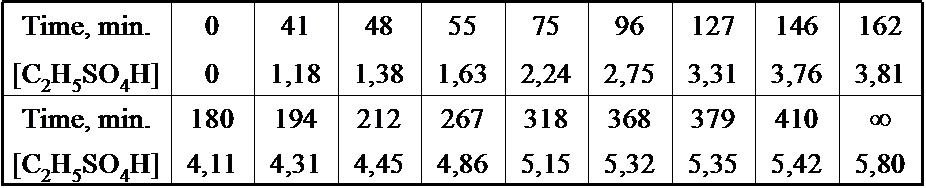

Initial concentrations of $H_2SO_4$ and $(C_2H_5)_2SO_4$ are each 5,5 mol/ℓ.  Find a rate equation for this reaction. [$k_1 = 6.7 \times 10^{-4}$ l/mol.min, Kc = 5]

# 5

Test 1 2016

Question 2											 [15]

A gas phase reversible reaction ($A + B \leftrightharpoons 3C$) was studied in a constant pressure piston reactor at different temperatures and the following equilibrium results were obtained:

Temperature (°C)|	$p_A$ (kPa)|	$p_B$ (kPa)|	$p_C$ (kPa)
---|---|---|---
100|	3.10|	6.20|	$3.91×10^2$
200|	$1.75×10^1$|	$2.07×10^1$|	$3.62×10^2$
300|	$4.11×10^1$|	$4.45×10^1$|	$3.15×10^2$

a)	Is the reaction exothermic or endothermic?	(3)

b)	Determine the enthalpy change of the reaction (ΔH) in kJ/mol	(5)

c)	Given the following information:

$V_o$ (L) =	1  

P (bar)  =	4

$N_{Ao}$ = 0.4 $N_{to}$

$N_{Bo}$ =	0.55 $N_{to}$

$N_{Co}$ =	0.05 $N_{to}$

$k_{o1}$ (forward reaction) =	$6 × 10^7$ L/(mol.min)

$E_1$ (forward reaction) =	60 kJ/mol

    i.	Determine the equilibrium conversion of A at a temperature of 236 °C, it can be assumed that the volume and pressure in the table applies to the system at this temperature.	
    ii.	Determine the time it takes to reach 99% of the equilibrium value of A	(7)


In [15]:
Kc = (0.05*4)**3/(0.4*4*0.55*4) 

    
def batch(t):    
    
    P = 4
    
    t_span = np.linspace(0,t,100)
    
    V = 1
    T = 236 + 273.12
    R = 8.314
    
    N = P*V/(R*T)
    
    initial_conditions = [0.4*N,0.55*N,0.05*N]
    
    k = 6*10**7
    m = 1
    n = 1
    
    def rates(t,y):
        
        NA,NB,NC = y[0],y[1],y[2]
        CA,CB,CC = NA/V , NB/V , NC/V
        
        rA = -k*(CA**m)*(CB**n)
        rB = rA
        rC = -3*rA
        
        dNA = rA*V
        dNB = rB*V
        dNC = rC*V
    
        return dNA,dNB,dNC
    

    
    solution = solve_ivp(rates,(0,t), initial_conditions,dense_output = True)
    
    sol = solution.sol(t_span)
    Na,Nb,Nc = sol[0][-1],sol[1][-1],sol[2][-1]
    Nt = Na+Nb+Nc
    
    Pa = Na/Nt*P
    Pb = Nb/Nt*P
    Pc = Nc/Nt*P
    
    
    return (Pc**3)/(Pa*Pb) - Kc

print(batch(100),Kc)


301662.28389565187 0.002272727272727273


# 6

For the liquid reaction in series:
$$ A \to B \to C $$
The following concentrations profiles were obtained in a batch reactor where pure A was initially loaded into  the reactor. Component A has a molar density of 5 mol/l.

Time (min)|	Concentration of A (mol/l)|	Concentration of B (mol/l)
---|---|---
1|	4.23|	0.82
2|	3.46|	1.39
3|	2.98|	1.83
4|	2.49|	2.07
5|	2.02|	2.15
7|	1.44|	2.27
9|	1.01|	2.07
11|	0.68|	1.89
16|	0.29|	1.49
32|	0.02|	0.69


•	What is the concentration of component A at time = 0?   		
•	Obtain the rate expressions for this reaction  [k1=0.18?/min, k2= 0.060?/min]
		




# 7

For two irreversible reactions in parallel with the same reaction order but different activation energies:
$$ A \to B $$
$$ A \to C $$
What will be the effect of temperature on the selectivity of C if the B reaction has a higher activation energy than the C reaction? 

# 8

6) Pure gaseous A is prepared under refrigeration and is introduced into a thin-walled capillary which acts as a reaction vessel as shown in the figure. No appreciable reaction occurs during handling.  The reaction vessel is rapidly plunged into a bath of boiling water, reactant A decomposes to completion according to the reaction $A \to R + S$, and the following data are obtained:


Time, min|0.5|1	|1.5	|2	|3	|4	|6	|10	|1000
:---|---:|---:|---:|---:|---:|---:|---:|---:|---:
Length of capillary  occupied by reaction mixture, cm	|6.1	|6.8	|7.2	|7.5	|7.85	|8.1	|8.4	|8.7|	9.4

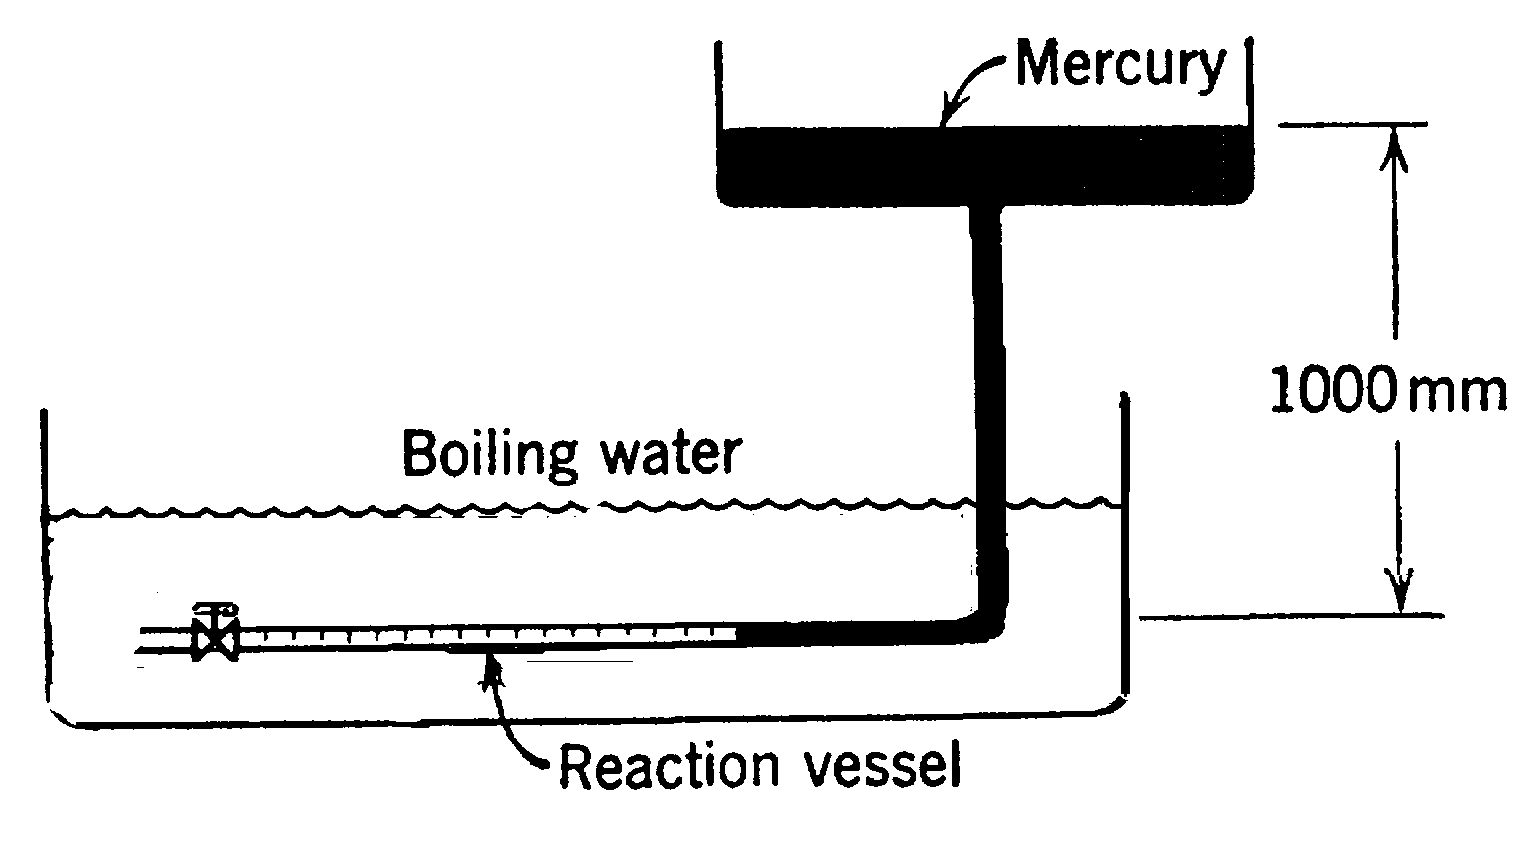

[$-r_A=12.95C_A^?$]

# 9

The following gas phase reactions occurs in a constant pressure batch reactor     (piston reactor).

$$ A+2B\to 30C\: k_{1A} = 2M^{-2}s^{-1} $$
$$ 10C+B\to 2A\: k_{2B} = 8M^{-2}s^{-1}\: (kC_C^2C_B) $$

The pressure is set at 2 bar and the temperature remains at 300K. An initial composition of 20% A and 80% B is fed. The first reaction is known to be elementary. Determine the maximum expansion (V/Vo) and the time at which it occurs. (@90 sec V/Vo=1.37)


None


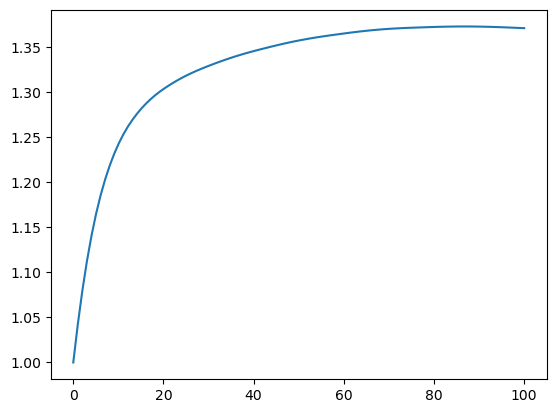

In [28]:
   
    
def batch(t):    
    
  
    P = 2*100
    R = 8.314
    T = 300
    
    t_span = np.linspace(0,t,100)
    
    V0 = 1
    
    Ni = P*V0/(R*T)
    
    N0 = [0.2*Ni,0.8*Ni,0,V0]
    
    initial_conditions = N0
    
    k1 = 2
    k2 = 8

    
    def rates(t,y):
        
        NA,NB,NC,V = y[0],y[1],y[2],y[3]
        
        N = NA + NB + NC
       
        CA,CB,CC = NA/V , NB/V , NC/V
        
        rA1 = -k1*(CA**1)*(CB**2)
        rB1 = rA1*2
        rC1 = -30*rA1
        
        rB2 = -k2*CC**2*CB 
        rC2 = 10*rB2
        rA2 = -2*rB2
        
        
        dNA = (rA1+rA2)*V
        dNB = (rB1+rB2)*V
        dNC = (rC1+rC2)*V
        dV = (dNA+dNB+dNC)*R*T/P
    
    
        return dNA,dNB,dNC,dV
    
    def events(t,y):
        
        return y
    
    solution = solve_ivp(rates,(0,t), initial_conditions,dense_output = True)
    
    sol = solution.sol(t_span)
    
    N = sol[0] + sol[1] + sol[2]
   
    
    plt.plot(t_span,sol[3])
   
    
    

print(batch(100))



# 10

The irreversible gas phase reaction:
$$ A\to 4B$$
 
was studied in the following batch reactor setup:

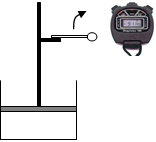
 
The reactor operates at constant volume of 25 liters if the pressure in the reactor is less than 2 bar. At 2 bar the pressure switch releases (see sketch), this activates the stopwatch and causes the reactor to operate as a constant pressure reactor (i.e. the piston will move and the reaction volume will change). An experiment was performed starting with 50% A and 50% inerts at 1.3 bar and 118°C at time=to. The following data was generated after the stopwatch got activated :
 

Time - ts (min)|	V/Vo
---|---
0|	1.00
1|	1.10
3|	1.22
5|	1.29
7|	1.34
9|	1.37
11|	1.40
13|	1.42
15|	1.44
17|	1.45

a)	What is the composition of the gas mixture when the stopwatch gets activated (at ts=0) [21% 47% 32%]

b)	How long does it take before the stopwatch gets activated (time from to to ts=0) [1.75 min]

